<a href="https://colab.research.google.com/github/ashiq-056/Clustering/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K-means**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.xlsx to data.xlsx


From Above cell files can be uploaded direct from local device.

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
#from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import time

In [ ]:
df = pd.read_excel("data.xlsx")

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


This is just a sample of a dataset that i have used.

In [ ]:
T = []
l = list(df['Gender'])
for i in l:
  if i == 'Male':
    T.append(True)
  else:
    T.append(False)

In [ ]:
colors = {True: 'red', False: 'green'}
T_col = [colors[i] for i in T]

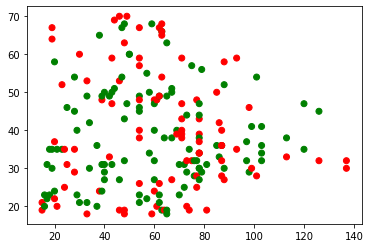

In [ ]:
plt.scatter(df['Annual Income (k$)'], df['Age'], c=T_col)

This is a visualization of scattered dataset.

In [ ]:
scaler = MinMaxScaler()

scaler.fit(df[['Annual Income (k$)']])
df['Annual Income (k$)'] = scaler.transform(df[['Annual Income (k$)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,0.019231,0.000000,39
1,2,Male,0.057692,0.000000,81
2,3,Female,0.038462,0.008197,6
3,4,Female,0.096154,0.008197,77
4,5,Female,0.250000,0.016393,40
...,...,...,...,...,...
195,196,Female,0.326923,0.860656,79
196,197,Female,0.519231,0.909836,28
197,198,Male,0.269231,0.909836,74
198,199,Male,0.269231,1.000000,18


Scaling of dataset

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

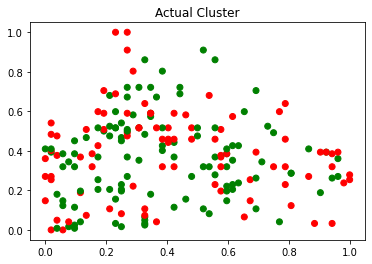

In [ ]:
plt.title('Actual Cluster')
plt.scatter(df['Age'], df['Annual Income (k$)'], c= T_col)
from google.colab import files
plt.savefig("scatter.png")
files.download("scatter.png")

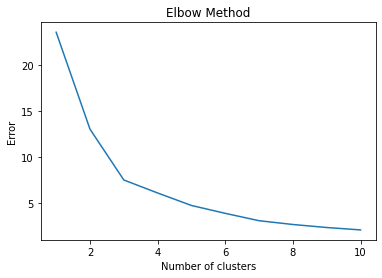

In [ ]:
#elbow method to get number of k
error = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i ,init='k-means++', n_init = 10 ,max_iter=300, tol=0.0001,  random_state= 0  , algorithm='auto')
  kmeans.fit(df[['Age', 'Annual Income (k$)']])
  error.append(kmeans.inertia_)
plt.plot(range(1, 11), error)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Error')
plt.show()

This is a elbow method where optimal number of cluster is obtained by measuring the error

In [ ]:
start_time = time.time()
kmeans = KMeans(n_clusters = 2 ,init='k-means++', n_init = 10 ,max_iter=300, tol=0.0001,  random_state= 0  , algorithm='auto')
pred = kmeans.fit_predict(df[['Age', 'Annual Income (k$)']])
print("--- %s seconds ---" % (time.time() - start_time))
df["Predict"] = pred

--- 0.03292226791381836 seconds ---


In [ ]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0], dtype=int32)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

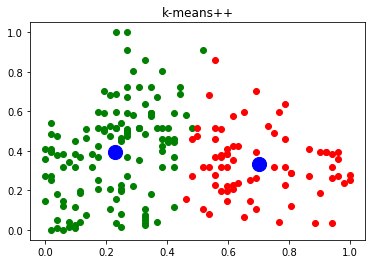

In [ ]:
df1 = df[df.Predict==0]
df2 = df[df.Predict==1]
df3 = df[df.Predict==2]
#df4 = df[df.Predict==3]
plt.title("k-means++")
plt.scatter(df1["Age"],df1['Annual Income (k$)'],color='green')
plt.scatter(df2["Age"],df2['Annual Income (k$)'],color='red')
plt.scatter(df3["Age"],df3['Annual Income (k$)'],color='black')
#plt.scatter(df4["Age"],df4['Annual Income (k$)'],color='blue')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='blue', label='centroid')


The final output or classification of two cluste. The blue ones are the centroid of k-means


In [ ]:
silhouette = silhouette_score(df[['Age', 'Annual Income (k$)']], pred)

In [ ]:
#Silhouette_Score
silhouette

0.41300834916124046

In [ ]:
ari = adjusted_rand_score(T, pred)
ari

-0.003159290370113585

In [ ]:
nmi = normalized_mutual_info_score(T, pred)
nmi

0.00025238456650062644

Different Parameter

In [ ]:
start_time = time.time()
kmeans2 = KMeans(n_clusters = 2 ,init='random', n_init = 10 ,max_iter=300, tol=0.0001,  random_state= 0  , algorithm='auto')
pred = kmeans.fit_predict(df[['Age', 'Annual Income (k$)']])
print("--- %s seconds ---" % (time.time() - start_time))
df["Predict"] = pred

--- 0.0480494499206543 seconds ---


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

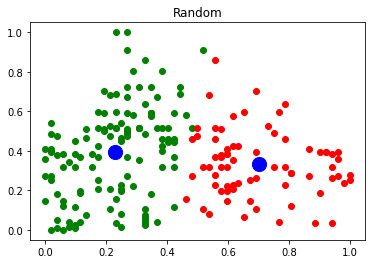

In [ ]:
df1 = df[df.Predict==0]
df2 = df[df.Predict==1]
df3 = df[df.Predict==2]
#df4 = df[df.Predict==3]
plt.title("Random")
plt.scatter(df1["Age"],df1['Annual Income (k$)'],color='green')
plt.scatter(df2["Age"],df2['Annual Income (k$)'],color='red')
plt.scatter(df3["Age"],df3['Annual Income (k$)'],color='black')
#plt.scatter(df4["Age"],df4['Annual Income (k$)'],color='blue')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='blue', label='centroid')
